In [32]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [40]:
euro_countries_2004 = {
    "Estonia": "EST",
    "Cyprus": "CYP",
    "Latvia": "LVA",
    "Lithuania": "LTU",
    "Malta": "MLT",
    "Slovakia": "SVK",
    "Slovenia": "SVN"
}

non_euro_countries_europe = {
    "Czech Republic": "CZE",
    "Denmark": "DNK",
    "Hungary": "HUN",
    "Poland": "POL",
    "Sweden": "SWE",
    "Turkey": "TUR"
}

# Years 1995 to 2014
years = list(range(1995, 2024))

# indicators from json/indicators.json at key 'indicators'
# Load the JSON data from the indicators file
with open('json/indicators.json') as file:
    indicators_data = json.load(file)

# Retrieve the indicators dictionary
indicators = list(indicators_data["indicators"].keys())

print(indicators)

['NGDP_RPCH', 'NGDPD', 'NGDPDPC', 'PPPGDP', 'PPPPC', 'PPPSH', 'PPPEX', 'PCPIPCH', 'PCPIEPCH', 'LP', 'BCA', 'BCA_NGDPD', '', 'LUR', 'GGXCNL_NGDP', 'GGXWDG_NGDP', 'rev', 'exp', 'prim_exp', 'ie', 'pb', 'd', 'rgc', 'rltir', 'extensive', 'intensive', 'total_theil', 'SITC1_0', 'SITC1_1', 'SITC1_2', 'SITC1_3', 'SITC1_4', 'SITC1_5', 'SITC1_6', 'SITC1_7', 'SITC1_8', 'SITC1_9', 'SITC1_total', 'DirectAbroad', 'DirectIn', 'PrivInexDI', 'PrivInexDIGDP', 'PrivOutexDI', 'PrivOutexDIGDP', 'Portfa', 'Portfl', 'EquityA', 'EquityL', 'DebtA', 'DebtL', 'OtherGov', 'OtherA', 'OtherL', 'Deriv', 'DebtForg', 'GDP', 'ka_new', 'ka_in', 'ka_out', 'FM_ka', 'Nonres_ka', 'Res_ka', 'Ka_eq', 'Ka_bo', 'Ka_mm', 'Ka_ci', 'Ka_dr', 'Ka_cc', 'Ka_fc', 'Ka_gu', 'Ka_di', 'ka_ldi', 'ka_ret', 'ka_pct', 'Reserves_ARA', 'Reserves_M2', 'Reserves_STD', 'Reserves_M', 'GRB_dummy', 'GDI_TC', 'GII_TC', 'DEBT1', 'Privatedebt_all', 'HH_ALL', 'NFC_ALL', 'PVD_LS', 'HH_LS', 'NFC_LS', 'PS_DEBT_GDP', 'NFPS_DEBT_GDP', 'GG_DEBT_GDP', 'CG_DEBT_GD

In [35]:
# Container to store the results as a list of records
data_records = []

# Loop through each indicator
for indicator in indicators:
    # Create the API URL for each indicator
    api_url = f'https://www.imf.org/external/datamapper/api/v1/{indicator}'
    print(f"Fetching data for indicator: {indicator} from {api_url}")  # Debug print

    # Fetch the data from the API
    response = requests.get(api_url)
    if response.status_code == 200:
        print(f"Success: Data fetched for indicator {indicator}")  # Debug print
        indicator_data = response.json().get("values", {}).get(indicator, {})

        # Process Euro countries
        for country, code in euro_countries_2004.items():
            if code in indicator_data:
                # Filter data by the specified years
                for year in years:
                    year_data = indicator_data[code].get(str(year), None)
                    if year_data is not None:
                        data_records.append({
                            "Country": country,
                            "Country Code": code,
                            "Indicator": indicator,
                            "Year": year,
                            "Value": year_data
                        })
                        print(f"Added data for {country} ({code}) for indicator {indicator}, year {year}")  # Debug print

        # Process Non-Euro countries
        for country, code in non_euro_countries_europe.items():
            if code in indicator_data:
                # Filter data by the specified years
                for year in years:
                    year_data = indicator_data[code].get(str(year), None)
                    if year_data is not None:
                        data_records.append({
                            "Country": country,
                            "Country Code": code,
                            "Indicator": indicator,
                            "Year": year,
                            "Value": year_data
                        })
                        print(f"Added data for {country} ({code}) for indicator {indicator}, year {year}")  # Debug print
    else:
        print(f"Failed to fetch data for indicator {indicator}, status code: {response.status_code}")

# Convert the data into a DataFrame
df = pd.DataFrame(data_records)

# Display the DataFrame
print(df)

Fetching data for indicator: NGDP_RPCH from https://www.imf.org/external/datamapper/api/v1/NGDP_RPCH
Success: Data fetched for indicator NGDP_RPCH
Added data for Estonia (EST) for indicator NGDP_RPCH, year 1995
Added data for Estonia (EST) for indicator NGDP_RPCH, year 1996
Added data for Estonia (EST) for indicator NGDP_RPCH, year 1997
Added data for Estonia (EST) for indicator NGDP_RPCH, year 1998
Added data for Estonia (EST) for indicator NGDP_RPCH, year 1999
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2000
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2001
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2002
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2003
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2004
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2005
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2006
Added data for Estonia (EST) for indicator NGDP_RPCH, year 2007
Added data for Estoni

In [36]:
# Add "Joined_Euro_2004" column based on membership in euro_countries_2004
df["Joined_Euro_2004"] = df["Country"].apply(lambda country: "Yes" if country in euro_countries_2004 else "No")

# Display the updated DataFrame
df.head()

,Country,Country Code,Indicator,Year,Value,Joined_Euro_2004
0,Estonia,EST,NGDP_RPCH,1995,2.2,Yes
1,Estonia,EST,NGDP_RPCH,1996,4.9,Yes
2,Estonia,EST,NGDP_RPCH,1997,13.1,Yes
3,Estonia,EST,NGDP_RPCH,1998,4.3,Yes
4,Estonia,EST,NGDP_RPCH,1999,-0.4,Yes


In [37]:
# Save the DataFrame to a CSV file
df.to_csv("imf_data.csv", index=False)

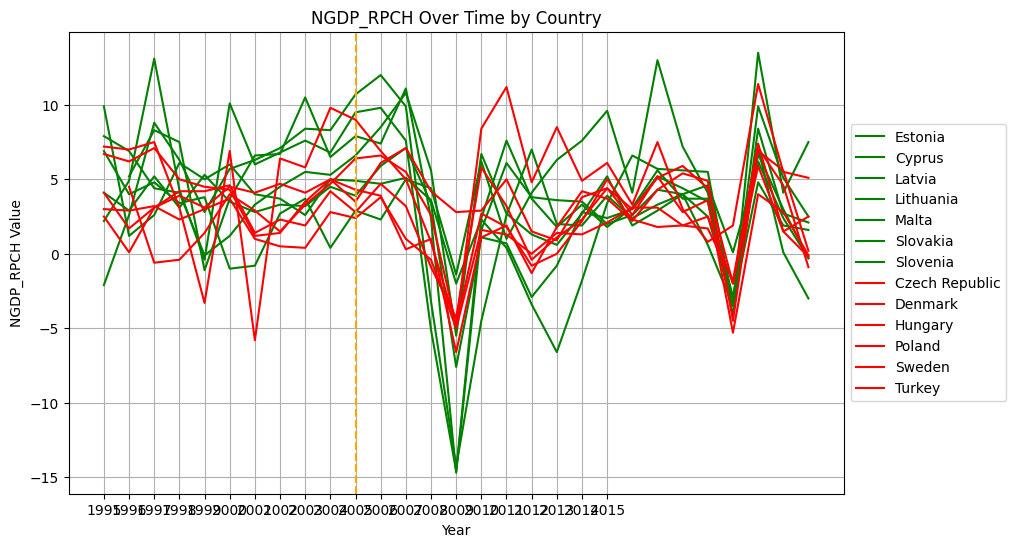

In [38]:
# Filter the DataFrame for the 'NGDP_RPCH' indicator
df_ngdp_rpch = df[df["Indicator"] == "NGDP_RPCH"]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each country individually
for country in df_ngdp_rpch["Country"].unique():
    country_data = df_ngdp_rpch[df_ngdp_rpch["Country"] == country]
    color = 'green' if country_data["Joined_Euro_2004"].iloc[0] == 'Yes' else 'red'
    plt.plot(country_data["Year"], country_data["Value"], label=country, color=color)

# Add labels and legend
plt.title("NGDP_RPCH Over Time by Country")
plt.xlabel("Year")
plt.ylabel("NGDP_RPCH Value")
plt.legend(title="Country")
plt.grid(True)

# make x-axis ticks integers between 1995 and 2015
plt.xticks(range(1995, 2016))

# Plot vertical line at 2005
plt.axvline(x=2005, color='orange', linestyle='--')

# Put legend right to chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

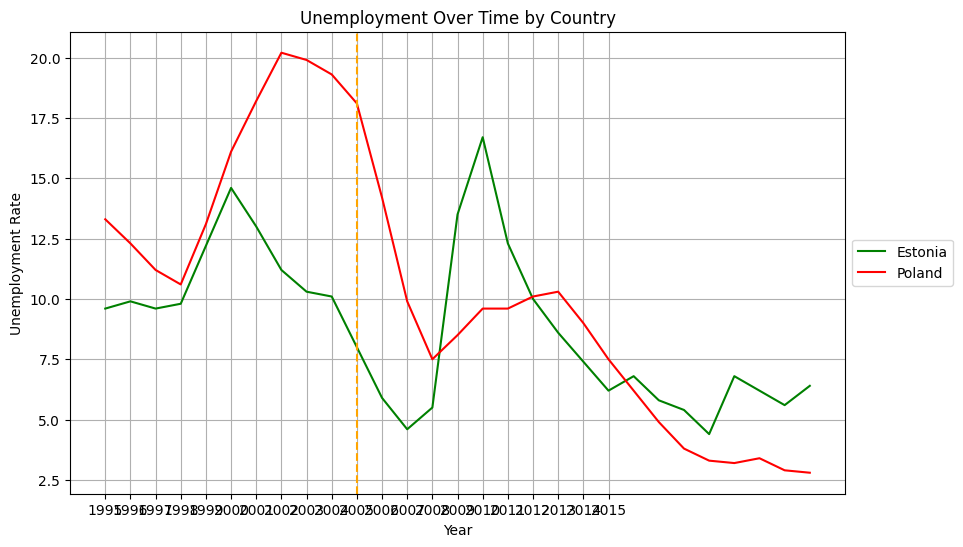

In [39]:
# Filter the DataFrame for the 'NGDP_RPCH' indicator
df_LUR = df[(df["Indicator"] == "LUR") & (df["Country"].isin(["Estonia", "Poland"]))]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each country individually
for country in df_LUR["Country"].unique():
    country_data = df_LUR[df_LUR["Country"] == country]
    color = 'green' if country_data["Joined_Euro_2004"].iloc[0] == 'Yes' else 'red'
    plt.plot(country_data["Year"], country_data["Value"], label=country, color=color)

# Add labels and legend
plt.title("Unemployment Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.grid(True)

# make x-axis ticks integers between 1995 and 2015
plt.xticks(range(1995, 2016))

# Plot vertical line at 2005
plt.axvline(x=2005, color='orange', linestyle='--')

# Put legend right to chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [41]:
# Transform indicators_data into a DataFrame and put indicators as rows with column header 'indicators' and all its keys as columns
df_indicators = pd.DataFrame(indicators_data["indicators"]).T

# Display the DataFrame
df_indicators.head()

,label,description,source,unit,dataset
NGDP_RPCH,Real GDP growth,Gross domestic product is the most commonly us...,World Economic Outlook (October 2024),Annual percent change,WEO
NGDPD,"GDP, current prices",Gross domestic product is the most commonly us...,World Economic Outlook (October 2024),Billions of U.S. dollars,WEO
NGDPDPC,"GDP per capita, current prices\n",Gross domestic product is the most commonly us...,World Economic Outlook (October 2024),U.S. dollars per capita,WEO
PPPGDP,"GDP, current prices",Gross domestic product is the most commonly us...,World Economic Outlook (October 2024),Purchasing power parity; billions of internati...,WEO
PPPPC,"GDP per capita, current prices",Gross domestic product (GDP) is the most commo...,World Economic Outlook (October 2024),Purchasing power parity; international dollars...,WEO


In [45]:
# Save the DataFrame to a CSV file
df_indicators.to_csv("indicators_data.csv", sep=",")

In [47]:
# Sample DataFrame structure for testing
# Assuming `df` is your original DataFrame with columns ["Country", "Country Code", "Indicator", "Year", "Value", "Joined_Euro_2004"]

# Pivot the DataFrame
df_pivot = df.pivot_table(
    index=["Indicator", "Year"],  # Rows grouped by Indicator and Year
    columns="Country",            # Columns for each country
    values="Value",               # Values to fill in the table
    aggfunc='first'               # In case there are multiple entries per year, take the first (or customize as needed)
).reset_index()

# Add columns for "Euro 2004" and "Non-Euro 2004" average values
# Define the lists for Euro and Non-Euro 2004 countries
euro_2004_countries = ["Estonia", "Cyprus", "Latvia", "Lithuania", "Malta", "Slovakia", "Slovenia"]
non_euro_2004_countries = ["Czech Republic", "Denmark", "Hungary", "Poland", "Sweden", "Turkey"]

# Calculate the average values for Euro 2004 and Non-Euro 2004 countries
df_pivot["Euro 2004"] = df_pivot[euro_2004_countries].mean(axis=1, skipna=True)
df_pivot["Non-Euro 2004"] = df_pivot[non_euro_2004_countries].mean(axis=1, skipna=True)

# Display the final DataFrame
df_pivot.head()

Country,Indicator,Year,Cyprus,Czech Republic,Denmark,Estonia,Hungary,Latvia,Lithuania,Malta,Poland,Slovakia,Slovenia,Sweden,Turkey,Euro 2004,Non-Euro 2004
0,AI_PI,2023,0.632394,0.646222,0.778522,0.764382,0.562962,0.632398,0.664884,0.659201,0.596885,0.591623,0.633862,0.7478,0.540187,0.654106,0.645430
1,BCA,1995,-0.205000,-1.369000,1.855000,-0.158000,-1.622000,-0.016000,-0.614000,-0.164000,0.854000,0.538000,-0.097000,8.3410,-2.339000,-0.102286,0.953333
2,BCA,1996,-0.468000,-4.121000,3.090000,-0.399000,-1.787000,-0.280000,-0.723000,-0.181000,-3.264000,-2.094000,0.015000,9.5140,-2.437000,-0.590000,0.165833
3,BCA,1997,-0.418000,-3.565000,2.278000,-0.563000,-1.920000,-0.345000,-0.981000,-0.095000,-5.744000,-1.930000,0.023000,10.1770,-2.638000,-0.615571,-0.235333
4,BCA,1998,0.292000,-1.254000,-0.264000,-0.480000,-3.442000,-0.650000,-1.298000,-0.098000,-6.901000,-2.185000,-0.147000,9.4840,2.000000,-0.652286,-0.062833


In [48]:
# Save the DataFrame to a CSV file
df_pivot.to_csv("imf_data_pivot.csv", index=False)